In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn import datasets, decomposition

In [2]:
phone = pd.read_csv('dataset_projek_ml.csv', sep = ",")
phone.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [3]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [4]:
dt1 = phone.iloc[:, 4:]
dt1.head()   

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,4085,6.67,Yes,1440,3120,8,12000,256.0,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,4000,6.50,Yes,1080,2400,8,6000,64.0,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,3969,6.50,Yes,1242,2688,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3110,6.10,Yes,828,1792,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4000,6.40,Yes,1080,2340,8,6000,128.0,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [5]:
dt2 = dt1.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 14, 17]]
dt2.head()  

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


In [6]:
variable = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']

In [7]:
pca = decomposition.PCA(n_components = 10)
pca.fit(dt2)

PCA(n_components=10)

In [8]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[1.93278903e+08 2.11457525e+06 4.14518614e+05 1.32265955e+05
 8.84215867e+03 3.38362394e+02 4.39225762e+01 1.55120305e+01
 2.40034756e+00 1.33889796e-01]


In [9]:
print(pca.explained_variance_ratio_)

[9.86370966e-01 1.07914294e-02 2.11543588e-03 6.75000200e-04
 4.51246797e-05 1.72678361e-06 2.24152524e-07 7.91634074e-08
 1.22498271e-08 6.83287236e-10]


In [10]:
var = np.round(pca.explained_variance_ratio_*100)
var

array([99.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

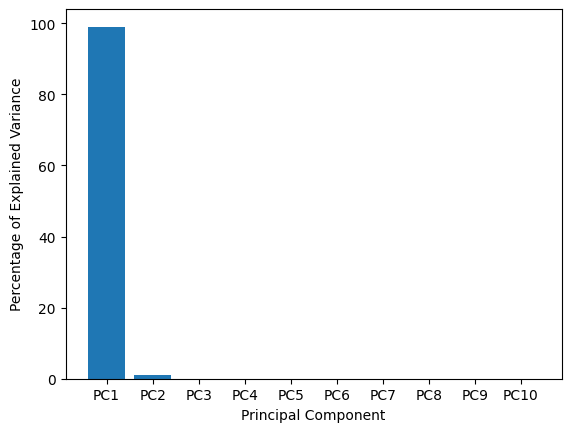

In [11]:
label = ['PC'+str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height=var,tick_label=label)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

In [12]:
pca.components_

array([[ 1.90234841e-02,  1.96934555e-05,  1.06116274e-02,
         2.33136327e-02,  4.85621801e-05,  7.42201168e-02,
         1.72418998e-03,  2.47034670e-04,  1.43156978e-04,
        -4.35698879e-06,  9.96729799e-01],
       [ 4.09474991e-01,  3.04629768e-04,  9.29249020e-02,
         2.23126800e-01,  8.84916879e-04,  8.76019501e-01,
         1.39018153e-02,  3.44750972e-03,  2.83722508e-03,
         2.42441664e-05, -7.92804304e-02],
       [ 8.99783717e-01,  2.84410915e-04,  1.68814301e-02,
         4.75642674e-02,  3.01330238e-04, -4.33114966e-01,
        -7.92010276e-03,  1.38560840e-04, -1.30507087e-05,
         1.20591369e-05,  1.37995172e-02],
       [-1.48831559e-01,  2.10059410e-04,  4.44494665e-01,
         8.60909706e-01,  1.26013427e-03, -1.97382569e-01,
        -9.45292176e-03,  1.90607765e-03,  3.06216272e-04,
        -1.87942022e-04, -7.31489570e-03],
       [ 1.42859260e-02, -9.34742515e-04,  8.90236195e-01,
        -4.54004451e-01, -3.66006989e-04,  1.50127785e-02,
  

In [13]:
loading_score = pd.Series(pca.components_[0],index=variable)
loading_score

x1     0.019023
x2     0.000020
x3     0.010612
x4     0.023314
x5     0.000049
x6     0.074220
x7     0.001724
x8     0.000247
x9     0.000143
x10   -0.000004
x11    0.996730
dtype: float64

In [14]:
loading_score1 = pd.Series(pca.components_[1],index=variable)
loading_score1

x1     0.409475
x2     0.000305
x3     0.092925
x4     0.223127
x5     0.000885
x6     0.876020
x7     0.013902
x8     0.003448
x9     0.002837
x10    0.000024
x11   -0.079280
dtype: float64

In [15]:
loading_score2 = pd.Series(pca.components_[2],index=variable)
loading_score2

x1     0.899784
x2     0.000284
x3     0.016881
x4     0.047564
x5     0.000301
x6    -0.433115
x7    -0.007920
x8     0.000139
x9    -0.000013
x10    0.000012
x11    0.013800
dtype: float64

In [16]:
loading_score3 = pd.Series(pca.components_[3],index=variable)
loading_score3

x1    -0.148832
x2     0.000210
x3     0.444495
x4     0.860910
x5     0.001260
x6    -0.197383
x7    -0.009453
x8     0.001906
x9     0.000306
x10   -0.000188
x11   -0.007315
dtype: float64

In [17]:
loading_score4 = pd.Series(pca.components_[4],index=variable)
loading_score4

x1     0.014286
x2    -0.000935
x3     0.890236
x4    -0.454004
x5    -0.000366
x6     0.015013
x7    -0.027550
x8    -0.009105
x9    -0.009327
x10   -0.000291
x11   -0.000198
dtype: float64

In [18]:
loading_score5 = pd.Series(pca.components_[5],index=variable)
loading_score5

x1     0.000332
x2     0.001968
x3     0.027949
x4    -0.007438
x5    -0.001767
x6    -0.017312
x7     0.998712
x8     0.022010
x9     0.030763
x10    0.000782
x11   -0.000578
dtype: float64

In [19]:
loading_score6 = pd.Series(pca.components_[6],index=variable)
loading_score6

x1    -0.001367
x2     0.005616
x3     0.008011
x4    -0.007512
x5     0.008591
x6    -0.002494
x7    -0.029919
x8     0.961382
x9     0.273157
x10   -0.001261
x11    0.000076
dtype: float64

In [20]:
loading_score7 = pd.Series(pca.components_[7],index=variable)
loading_score7

x1    -0.000670
x2     0.014685
x3     0.005023
x4    -0.003073
x5     0.070195
x6    -0.001158
x7    -0.023588
x8    -0.273916
x9     0.958744
x10    0.006568
x11    0.000085
dtype: float64

In [21]:
loading_score8 = pd.Series(pca.components_[8],index=variable)
loading_score8

x1    -0.000396
x2     0.038307
x3    -0.000667
x4    -0.001221
x5     0.996452
x6    -0.000324
x7     0.003602
x8     0.011028
x9    -0.070460
x10    0.022691
x11    0.000019
dtype: float64

## Variabel yang digunakan adalah x2,5, dan 10

In [22]:
dt3 = dt2.iloc[:, [1, 4, 9]]
dt3

,Screen size (inches),Processor,Number of SIMs
0,6.67,8,2
1,6.50,8,2
2,6.50,6,2
3,6.10,6,2
4,6.40,8,1
...,...,...,...
1354,4.00,4,2
1355,5.00,4,2
1356,4.50,2,2
1357,4.00,1,2


In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

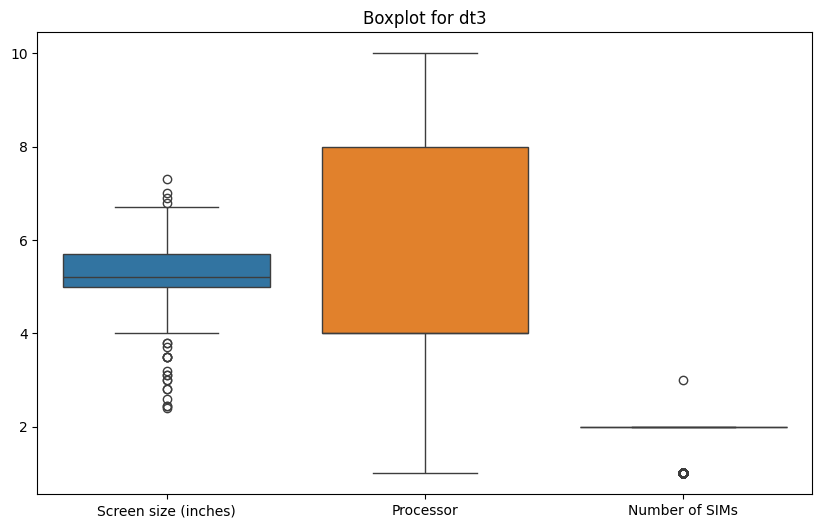

In [25]:
plt.figure(figsize=(10, 6))

# Create a boxplot for each column in dt3
sns.boxplot(data=dt3)

plt.title('Boxplot for dt3')
plt.show()

In [26]:
dt3_no_outliers = dt3.copy()

for column in dt3:
    Q1 = dt3[column].quantile(0.25)
    Q3 = dt3[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (dt3[column] >= Q1 - 1.5 * IQR) & (dt3[column] <= Q3 + 1.5 *IQR)
    dt3_no_outliers = dt3_no_outliers.loc[filter]

    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}\n')

    UCL = Q3 + 1.5 * IQR
    LCL = Q1 - 1.5 * IQR
    print(f'UCL: {UCL}')
    print(f'LCL: {LCL}')
    


Q1: 5.0
Q3: 5.7
IQR: 0.7000000000000002

UCL: 6.75
LCL: 3.9499999999999997
Q1: 4.0
Q3: 8.0
IQR: 4.0

UCL: 14.0
LCL: -2.0
Q1: 2.0
Q3: 2.0
IQR: 0.0

UCL: 2.0
LCL: 2.0


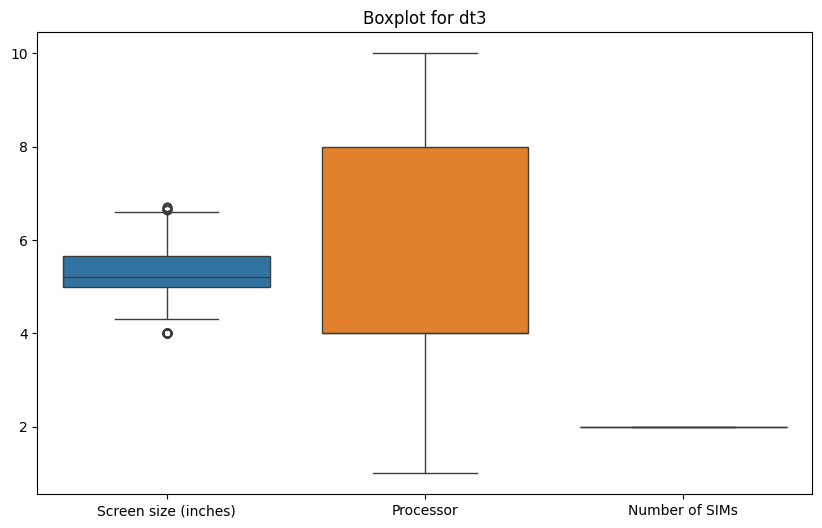

In [27]:
plt.figure(figsize=(10, 6))

# Create a boxplot for each column in dt3

sns.boxplot(data=dt3_no_outliers)

plt.title('Boxplot for dt3')
plt.show()

In [28]:
phone1 = pd.read_csv('dataset_projek_ml_setelah_boxplot.csv', sep = ";")
phone1.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,5,OnePlus 7T,OnePlus,7T,3800,6.55,Yes,1080,2400,8,...,48.0,16.0,Android,Yes,Yes,No,2,Yes,Yes,34930


In [29]:
phone1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1120 non-null   int64  
 1   Name                    1120 non-null   object 
 2   Brand                   1120 non-null   object 
 3   Model                   1120 non-null   object 
 4   Battery capacity (mAh)  1120 non-null   int64  
 5   Screen size (inches)    1120 non-null   float64
 6   Touchscreen             1120 non-null   object 
 7   Resolution x            1120 non-null   int64  
 8   Resolution y            1120 non-null   int64  
 9   Processor               1120 non-null   int64  
 10  RAM (MB)                1120 non-null   int64  
 11  Internal storage (GB)   1120 non-null   float64
 12  Rear camera             1120 non-null   float64
 13  Front camera            1120 non-null   float64
 14  Operating system        1120 non-null   

In [30]:
dt4 = phone1.iloc[:, [5, 9, 18]]    
dt4  

,Screen size (inches),Processor,Number of SIMs
0,6.67,8,2
1,6.50,8,2
2,6.50,6,2
3,6.10,6,2
4,6.55,8,2
...,...,...,...
1115,4.00,4,2
1116,5.00,4,2
1117,4.50,2,2
1118,4.00,1,2


In [31]:
dt4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Screen size (inches)  1120 non-null   float64
 1   Processor             1120 non-null   int64  
 2   Number of SIMs        1120 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 26.4 KB


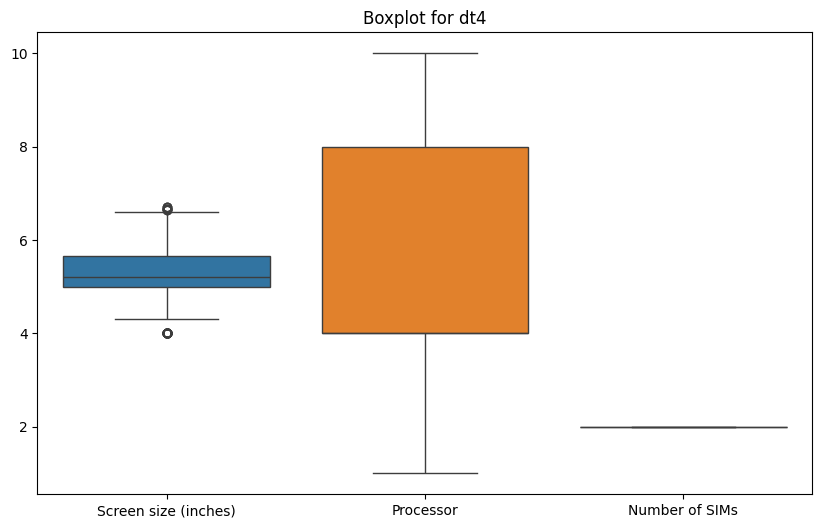

In [32]:
plt.figure(figsize=(10, 6))

# Create a boxplot for each column in dt3
sns.boxplot(data=dt4)

plt.title('Boxplot for dt4')
plt.show()

In [33]:
dt4_no_outliers = dt4.copy()

for column in dt4:
    Q1 = dt4[column].quantile(0.25)
    Q3 = dt4[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (dt4[column] >= Q1 - 1.5 * IQR) & (dt4[column] <= Q3 + 1.5 *IQR)
    dt4_no_outliers1 = dt4_no_outliers.loc[filter]

    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}\n')

    UCL = Q3 + 1.5 * IQR
    LCL = Q1 - 1.5 * IQR
    print(f'UCL: {UCL}')
    print(f'LCL: {LCL}')

Q1: 5.0
Q3: 5.65
IQR: 0.6500000000000004

UCL: 6.625000000000001
LCL: 4.0249999999999995
Q1: 4.0
Q3: 8.0
IQR: 4.0

UCL: 14.0
LCL: -2.0
Q1: 2.0
Q3: 2.0
IQR: 0.0

UCL: 2.0
LCL: 2.0


## Outlier yang ada di setiap kolom dihapus


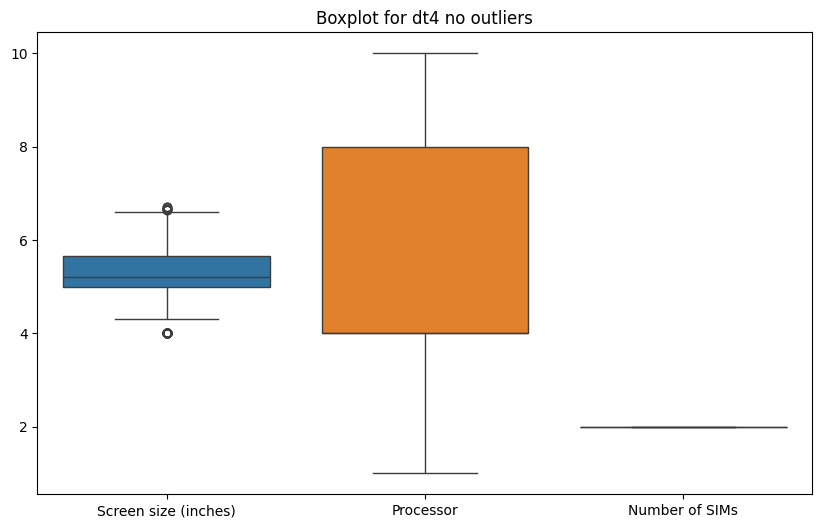

In [34]:
plt.figure(figsize=(10, 6))

# Create a boxplot for each column in dt3
sns.boxplot(data=dt4_no_outliers1)

plt.title('Boxplot for dt4 no outliers')
plt.show()

In [35]:
dt4_no_outliers1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 0 to 1119
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Screen size (inches)  1120 non-null   float64
 1   Processor             1120 non-null   int64  
 2   Number of SIMs        1120 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 35.0 KB


## Masalah teknis dengan boxplot


In [535]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dt4)
    kmeanModel.fit(dt4)
    
    distortions.append(sum(np.min(cdist(dt4, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / dt4.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(dt4, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / dt4.shape[0]
    mapping2[k] = kmeanModel.inertia_

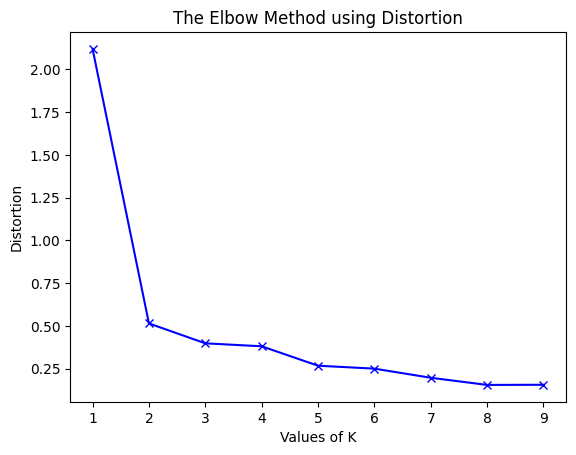

In [536]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [537]:
model = KMeans(n_clusters=3)

In [538]:
model.fit(dt4)

KMeans(n_clusters=3)

In [539]:
labels = model.predict(dt4)
labels
rows = ["{}".format(i) for i in labels] 
text = "\n".join(rows) 
  
with open('data4.csv', 'w') as f: 
    f.write(text)

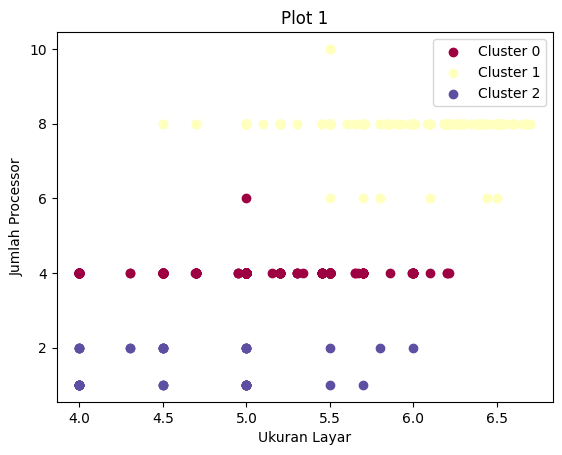

In [540]:
x = dt4.iloc[:,0] ## ukuran layar
y = dt4.iloc[:,1] ## jumlah processor
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = dt4[class_member_mask]
    plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], c=[col], label=f'Cluster {k}')

plt.xlabel('Ukuran Layar')
plt.ylabel('Jumlah Processor')
plt.title('Plot 1')
plt.legend()
plt.show()


### Cluster 0: Screen Size: Low-High; Processor: Medium
### Cluster 1: Screen Size: Low-High; Processor: High
### Cluster 2: Screen Size: Low-High; Processor: Low

## Plot 2

In [543]:
model1 = KMeans(n_clusters=3)

In [544]:
model1.fit(dt4)

KMeans(n_clusters=3)

In [545]:
labels1 = model1.predict(dt4)
labels1
rows = ["{}".format(i) for i in labels1] 
text = "\n".join(rows) 
  
with open('data4-1.csv', 'w') as f: 
    f.write(text)

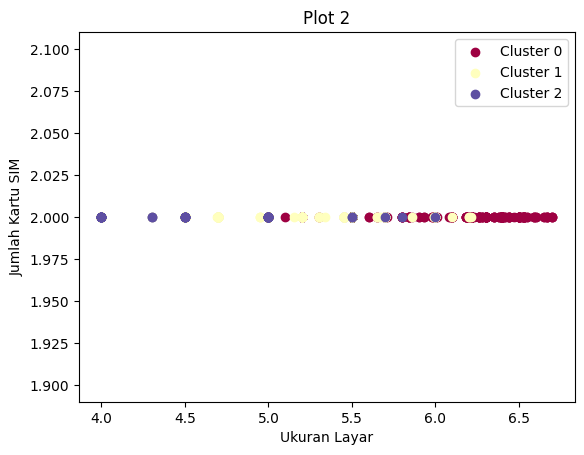

In [546]:
x1 = dt4.iloc[:,0] ## ukuran layar
y1 = dt4.iloc[:,2] ## jumlah kartu SIM
unique_labels1 = set(labels1)
colors1 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels1))]

for k, col in zip(unique_labels1, colors1):
    class_member_mask1 = (labels1 == k)
    x1y1 = dt4[class_member_mask1]
    plt.scatter(x1y1.iloc[:, 0], x1y1.iloc[:, 2], c=[col], label=f'Cluster {k}')

plt.xlabel('Ukuran Layar')
plt.ylabel('Jumlah Kartu SIM')
plt.title('Plot 2')
plt.legend()
plt.show()

## Plot 3

In [547]:
model2 = KMeans(n_clusters=3)

In [548]:
model2.fit(dt4)

KMeans(n_clusters=3)

In [549]:
labels2 = model2.predict(dt4)
labels2
rows = ["{}".format(i) for i in labels2] 
text = "\n".join(rows) 
  
with open('data4-2.csv', 'w') as f: 
    f.write(text)

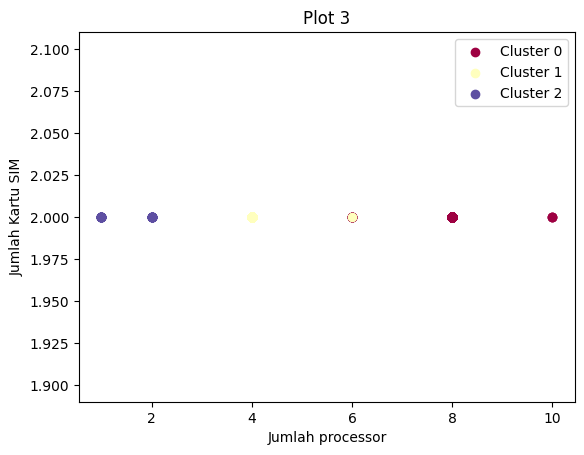

In [550]:
x2 = dt4.iloc[:,1] ## ukuran layar
y2 = dt4.iloc[:,2] ## jumlah kartu SIM
unique_labels2 = set(labels2)
colors2 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels2))]

for k, col in zip(unique_labels2, colors2):
    class_member_mask2 = (labels2 == k)
    x2y2 = dt4[class_member_mask2]
    plt.scatter(x2y2.iloc[:, 1], x2y2.iloc[:, 2], c=[col], label=f'Cluster {k}')

plt.xlabel('Jumlah processor')
plt.ylabel('Jumlah Kartu SIM')
plt.title('Plot 3')
plt.legend()
plt.show()